# 📊 Ecommerce Customer Behavior Analysis
Realistic linear regression project based on ecommerce data.

In [14]:
# 1. Bibliotekų importavimas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 2. Duomenų įkėlimas 

In [15]:
df = pd.read_csv('ecommerce_data.csv')
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,dylanfigueroa@gmail.com,Amberport,Yellow,36.499533,12.816478,36.864202,3.430173,1637.705975
1,jenniferjohnson@yahoo.com,South Brendan,Pink,29.882475,8.679951,40.425438,4.882205,1506.393261
2,howardsteven@anthony.org,Wandaborough,Green,30.729367,14.361599,31.993994,4.195392,1532.056945
3,thompsonheather@gmail.com,Colefort,Pink,32.476425,7.389990,33.712179,4.779748,1537.886834
4,dennisjimenez@trevino.com,New Kimberlyport,Pink,36.849881,11.902622,41.525216,5.215344,1808.137508


## 🔍 3. EDA – Exploratory Data Analysis -- Duomenų apžvalga

In [16]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,33.001471,12.502138,37.002616,4.507622,1596.426113
std,1.995048,2.003117,2.504383,1.501830,99.618723
min,24.068792,3.574063,27.737125,-1.498998,1202.876998
25%,31.635027,11.152849,35.331531,3.493280,1528.573027
50%,33.006712,12.509873,37.003752,4.507784,1595.656473
75%,34.360843,13.853880,38.690830,5.513470,1664.676694
max,41.958169,20.020310,46.574455,10.803039,1974.165348


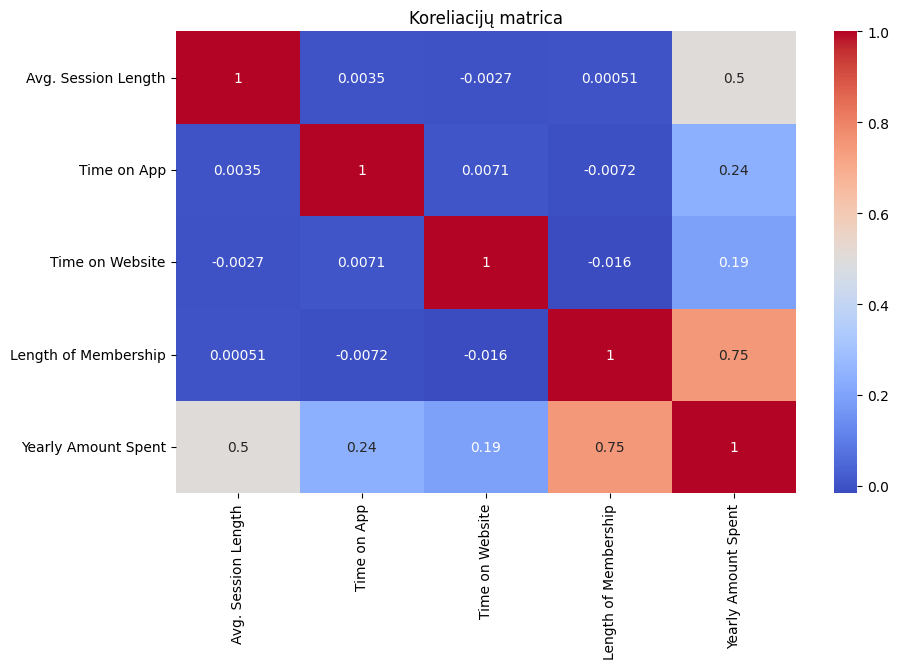

In [17]:
# Koreliacijų matrica - šilumos žemėlapis
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Koreliacijų matrica')
plt.show()

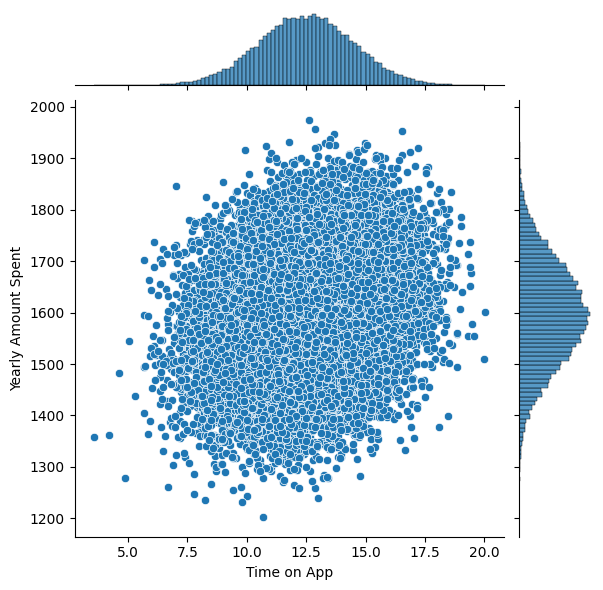

In [18]:
# Koreliacija tarp 'Time on App' ir 'Yearly Amount Spent'
sns.jointplot(x='Time on App', y='Yearly Amount Spent', data=df)

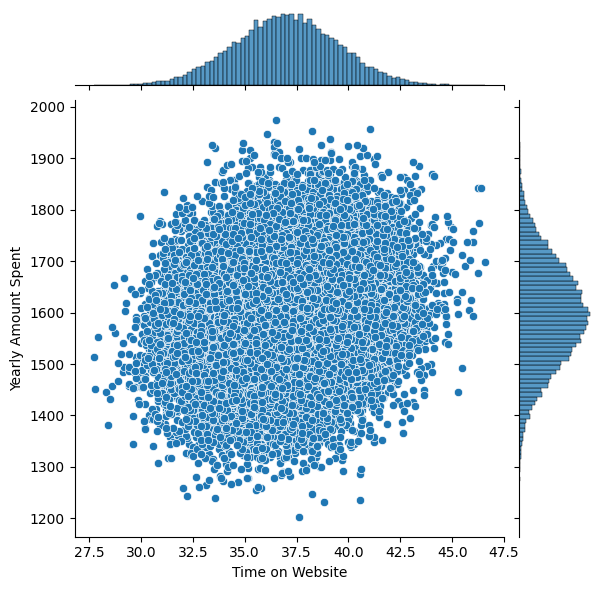

In [19]:
# Koreliacija tarp 'Time on Website' ir 'Yearly Amount Spent'
sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data=df)

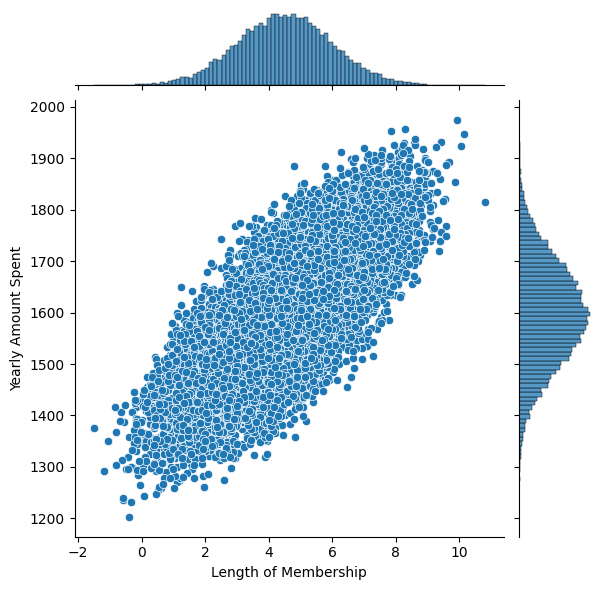

In [20]:
# Koreliacija tarp 'Length of Membership' ir 'Yearly Amount Spent'
sns.jointplot(x='Length of Membership', y='Yearly Amount Spent', data=df)

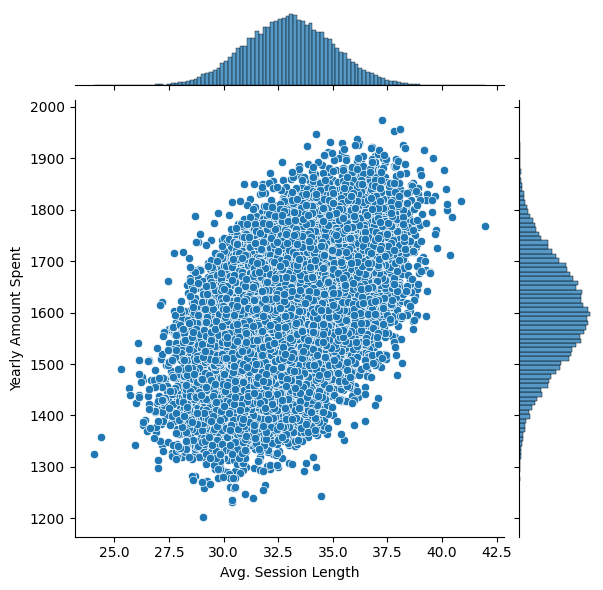

In [21]:
# Koreliacija tarp 'Avg. Session Length' ir 'Yearly Amount Spent'
sns.jointplot(x='Avg. Session Length', y='Yearly Amount Spent', data=df)

## 📈 4. Regresijos modelio treniravimas

In [27]:
X = df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = df['Yearly Amount Spent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

LinearRegression_lm = LinearRegression()
LinearRegression_lm.fit(X_train, y_train)
y_pred = LinearRegression_lm.predict(X_test)

In [30]:
y_test

2308     1726.992764
22404    1685.174854
23397    1826.611896
25058    1747.963753
2664     1531.461433
            ...     
2210     1620.466640
14144    1582.230477
23108    1571.704630
25703    1485.267214
29171    1605.437019
Name: Yearly Amount Spent, Length: 6000, dtype: float64

In [31]:
y_pred

array([1736.52908253, 1676.08049904, 1814.79762006, ..., 1597.66524356,
       1443.01772032, 1648.38938308])

In [28]:
# Modelio metrikos
print('MAE:', mean_absolute_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test, y_pred))

MAE: 23.872412368529506
RMSE: 29.822878826611035
R2 Score: 0.908701236106622


🧠 Interpretacija
	•	📈 R² = 0.91 reiškia, kad modelis labai gerai atitinka duomenis – apie 91% metinių klientų išlaidų gali būti paaiškinta pagal pasirinktus kintamuosius.
	•	📉 MAE ≈ 24 $ – tai vidutinė prognozės paklaida. Vadinasi, modelis vidutiniškai “prašauna” apie 24 $ prognozuodamas, kiek klientas išleis.
	•	🧮 RMSE ≈ 30 $ – rodo, kad didesni nukrypimai turi daugiau įtakos, bet klaidos vis tiek yra santykinai nedidelės.

    Modelis yra tikslus ir patikimas, todėl jį galima naudoti norint prognozuoti klientų išlaidas pagal jų elgseną. Šiuos rezultatus galima taikyti rinkodaros segmentavimui, klientų vertės modeliui (CLV) ar personalizuotoms rekomendacijoms kurti.

## 📊 5. Funkcijų svarbos analizė

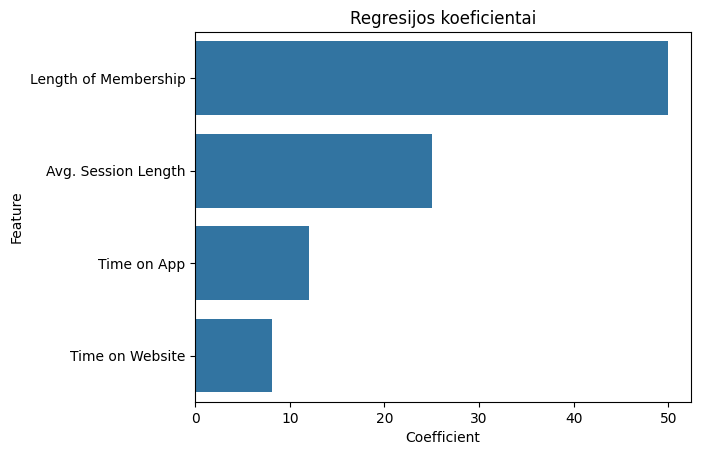

,Feature,Coefficient,Intercept
0,Avg. Session Length,25.016713,95.305922
1,Time on App,12.059982,95.305922
2,Time on Website,8.101513,95.305922
3,Length of Membership,49.929843,95.305922


In [35]:
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': LinearRegression_lm.coef_,
    'Intercept': LinearRegression_lm.intercept_
})
sns.barplot(x='Coefficient', y='Feature', data=coeff_df.sort_values(by='Coefficient', ascending=False))
plt.title('Regresijos koeficientai')
plt.show()
coeff_df

## 📉 6. Likučių analizė

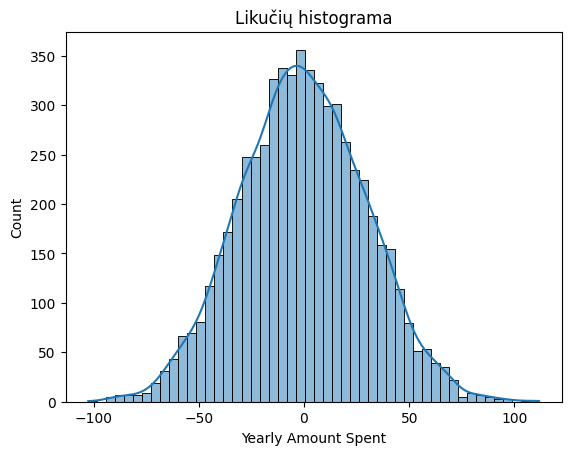

In [25]:
# Likučių paskirstymas
residuals = y_test - y_pred
sns.histplot(residuals, bins=50, kde=True)
plt.title('Likučių histograma')
plt.show()

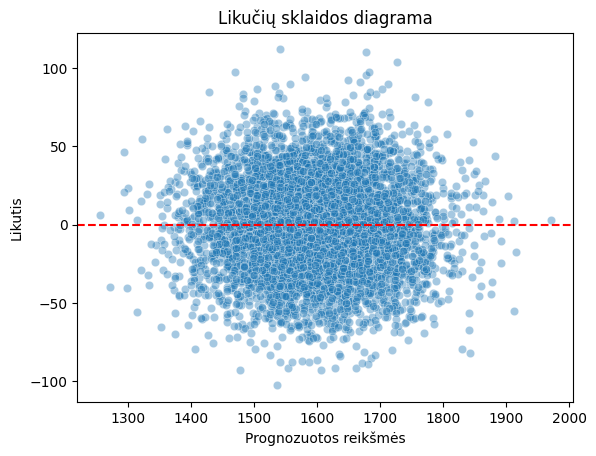

In [34]:
# Likučiai vs prognozės
sns.scatterplot(x=y_pred, y=residuals, alpha=0.4)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Prognozuotos reikšmės')
plt.ylabel('Likutis')
plt.title('Likučių sklaidos diagrama')
plt.show()

## 📊 Likučių sklaidos diagramos interpretacija

Šis grafikas vaizduoja **likučių (residuals)** pasiskirstymą priklausomai nuo prognozuotų reikšmių (`y_pred`). Jis naudojamas regresijos modelio diagnostikai.

### 🔍 Ašių reikšmės:
- **X ašis**: prognozuotos reikšmės (modelio spėjimai)
- **Y ašis**: likučiai (skirtumas tarp tikrosios ir prognozuotos reikšmės: `y - y_pred`)
- **Raudona punktyrinė linija**: nulinis likutis (tobula prognozė)

---

### ✅ Interpretacija:

1. **Likučių išsidėstymas aplink nulį**  
   Likučiai pasiskirstę **simetriškai aplink 0**. Tai reiškia, kad modelis nesistemingai klysta – nėra šališkas.

2. **Nėra aiškios struktūros**  
   Diagrama neturi „U“ formos ar kitų raštų – tai rodo, kad **nėra praleistų nelinearinių ryšių**.

3. **Pastovus klaidų išsibarstymas (homoskedastiškumas)**  
   Likučiai išsidėstę maždaug vienodai per visą prognozuotų reikšmių spektrą – **klaidų variacija stabili**, nėra „vėduoklės efekto“.

---

### ⚠️ Kada tokie grafikai būtų probleminiai?

| Problema                | Kaip tai atrodytų             | Ką tai reiškia                                   |
|-------------------------|-------------------------------|--------------------------------------------------|
| Nelinearumas            | U formos struktūra            | Modelis per paprastas, trūksta sąveikų ar kvadratinių terminų |
| Heteroskedastiškumas    | „Vėduoklės“ forma             | Klaidų variacija priklauso nuo prognozės lygio   |
| Šališkumas              | Likučiai pasvirę į vieną pusę | Modelis sistemingai pervertina arba neįvertina   |

---

### 🟢 Išvada:

> Šis modelis **atitinka pagrindines linijinės regresijos prielaidas**:
> - Nėra sisteminio šališkumo
> - Nėra nelinearumo požymių
> - Klaidų variacija yra pastovi
>
> ✅ Tai reiškia, kad modelis **tinkamai aprašo duomenų struktūrą pagal likučių analizę**.